# Week 6 -- A little more Sympy, some stats, plotting and data acquisition

## The remaining bits of Sympy. 

* Solving systems of equations with Sympy
* Comparing with matplotlib
* Solving differential equations with Sympy


In [2]:
import sympy as sp
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Last class we were solving the system of equations
$$ x^2 + y^2 = 4, \hskip 1cm xy = 1$$
using **mpmath** and **sympy**. 

In [3]:
## mpmath
f = [lambda x,y: x**2 + y**2 - 4, lambda x,y: x*y-1.0]
roots = mp.findroot(f, (0.2, 0.1) )
## findroot takes a list of equations, and an initial guess for (x,y)
print(roots[0], roots[1], sep=', ')

1.93185165257814, 0.517638090205042


In [4]:
## sympy
x,y = sp.symbols('x y')
sol =  sp.solve([x**2+y**2-4, x*y-1])
## takes a list of equations, but no initial guess is required
for S in sol:
    sp.pprint(S)

for S in sol:
    print("Sympy (as float): ", S[x].evalf(8), S[y].evalf(8))

print("\nMPMATH sol: ", roots[0],roots[1] )
  

⎧   ⎛       _________⎞   _________ ⎛    _________    ⎞        _________⎫
⎨x: ⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠, y: -╲╱ -√3 + 2 ⎬
⎩                                                                      ⎭
⎧    ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫
⎨x: -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬
⎩                                                                    ⎭
⎧   ⎛       ________⎞   ________ ⎛    ________    ⎞        ________⎫
⎨x: ⎝-2 - ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝- ╲╱ √3 + 2  + 2⎠, y: -╲╱ √3 + 2 ⎬
⎩                                                                  ⎭
⎧    ⎛       ________⎞   ________ ⎛  ________    ⎞       ________⎫
⎨x: -⎝-2 + ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝╲╱ √3 + 2  + 2⎠, y: ╲╱ √3 + 2 ⎬
⎩                                                                ⎭
Sympy (as float):  -1.9318517 -0.51763809
Sympy (as float):  1.9318517 0.51763809
Sympy (as float):  -0.51763809 -1.9318517
Sympy (as float):  0.51763809 1.9318

Let's plot the solutions:

* To the individual equations
* And to the system


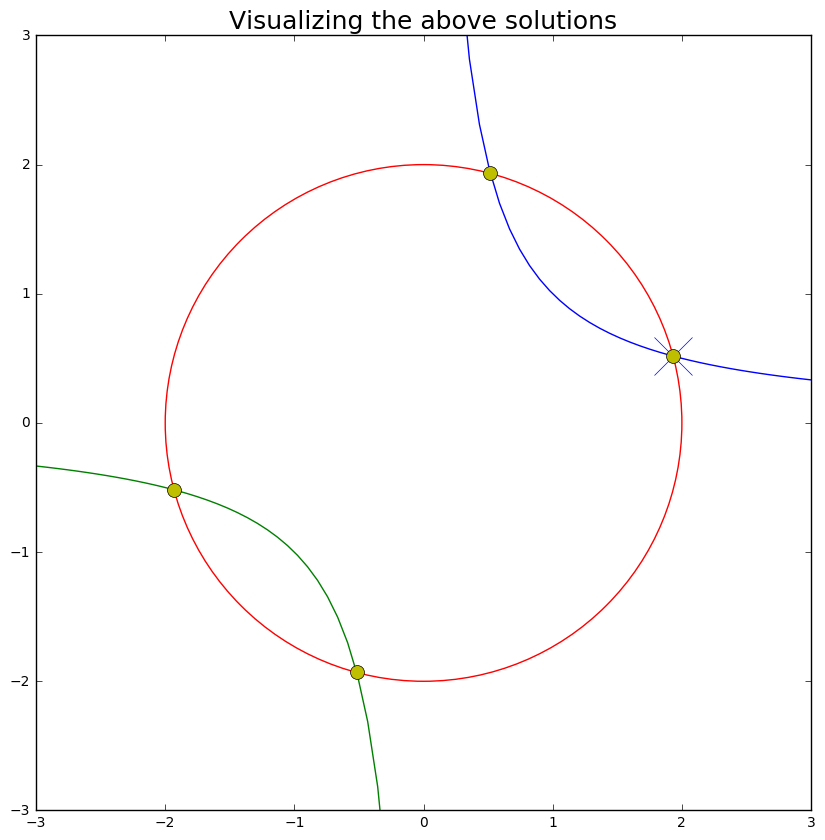

In [5]:
## And we can visualize the solutions with matplotlib
fig, ax = plt.subplots(figsize=(10,10))
circle = plt.Circle( (0,0), 2, color='r', fill=False)

x1 = np.linspace(0.2, 4)
y1 = x1**(-1)
ax.plot(x1, y1,'-')

x2 = np.linspace(-4,-0.2)
y2 = x2**(-1)
ax.plot(x2, y2,'-')

ax.set_title('Visualizing the above solutions', fontsize=18)

## the root we found with Newton's method, a big black x.
ax.plot([roots[0]], [roots[1]], 'bx', markersize=28)

## the roots we found with sympy, yellow dots.
ax.plot([sol[i][x].evalf(10) for i in range(len(sol))], [sol[i][y].evalf(10)\
                                                         for i in range(len(sol))],'yo', markersize=10)

fig.gca().add_artist(circle)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.show()

The next example gives you a sense for how Sympy solves complicated algebraic equations. 

Notice the equation below is basically the previous equation but with $x$ replaced by $\cos(x)$ and $y$ replaced by $\sin(y)$. 

This gives you a key insight into how sympy solves equations. It has strong *core* routines for solving polynomial equations, which is uses as a fundamental building-block for solving more complicated algebraic equations.

In [6]:
sol = sp.solve([sp.cos(x)**2 + sp.sin(y)**2 - 4, sp.cos(x)*sp.sin(y)-1 ])
print(type(sol))
print(len(sol))
for i in range(len(sol)): 
    print("Solution " + str(i))
    sp.pprint(sol[i])
    print("\n")  

<class 'list'>
16
Solution 0
⎧             ⎛    -1     ⎞         ⎛  _________⎞    ⎫
⎪x: 2⋅π - acos⎜───────────⎟, y: asin⎝╲╱ -√3 + 2 ⎠ + π⎪
⎨             ⎜  _________⎟                          ⎬
⎪             ⎝╲╱ -√3 + 2 ⎠                          ⎪
⎩                                                    ⎭


Solution 1
⎧             ⎛    -1     ⎞          ⎛  _________⎞⎫
⎪x: 2⋅π - acos⎜───────────⎟, y: -asin⎝╲╱ -√3 + 2 ⎠⎪
⎨             ⎜  _________⎟                       ⎬
⎪             ⎝╲╱ -√3 + 2 ⎠                       ⎪
⎩                                                 ⎭


Solution 2
⎧             ⎛     1     ⎞           ⎛  _________⎞    ⎫
⎪x: 2⋅π - acos⎜───────────⎟, y: - asin⎝╲╱ -√3 + 2 ⎠ + π⎪
⎨             ⎜  _________⎟                            ⎬
⎪             ⎝╲╱ -√3 + 2 ⎠                            ⎪
⎩                                                      ⎭


Solution 3
⎧             ⎛     1     ⎞         ⎛  _________⎞⎫
⎪x: 2⋅π - acos⎜───────────⎟, y: asin⎝╲╱ -√3 + 2 ⎠⎪
⎨         

## Summary

Sympy has a systematic way of solving algebraic equations.  

 * At its core is a strong semi-algorithm to solve systems of polynomial equations.
     - An example system: $x^3+3xy+1=0 = y^4-x^2y+x+4 $
     - To solve such equations Sympy uses a **Groebner basis algorithm** to convert such systems of *multi-variable polynomial* equations into systems of *single-variable* polynomial equations. This is a reliable algorithm, although it can be slow (double-exponential run-time estimates).
     - Sympy does not know how to write "closed-form" solutions to all single variable polynomial equations, but it has a significant repository of closed-form solutions, as we have seen. 
     - As a side-note, it is *known* that the solutions to a general degree $5$ (or higher) polynomial equation $a_5x^5+a_4x^4+a_3x^3+a_2x^2+a_1x+a_0=0$ can not be expressed as a rational polynomial in rational powers (recursively) of $a_5,\cdots,a_0$, although as we have seen above this **can** be done if the degree is $4$ or less.   So one generally *can not* hope for simple formulas for such roots.

 * For more complicated systems, such as $\sin(x)^3+3\sin(x)\cos(y)+1=0=\sin(y)^4-\cos(x)^2+\cos(x)+4$ sympy thinks of the system as a polynomial equation in the variables $\sin(x), \cos(y)$ and computes $\sin^{-1}$ and $\cos^{-1}$ of the solutions.
 
 * Sympy also has adapted versions of the above algorithms to find closed-form solutions to some differential equations.  We will talk more about this when we discuss simulating solutions to differential equations.  One particularly simple case appears below.
 
 * * *

## Sympy and ODEs

Sympy's algorithms for finding *anti-derivatives* have been adapted to algorithms for finding *closed-form* solutions to differential equations.  

These algorithms are strongest for **ODEs** but there are also algorithms for **PDEs**, delay differential equations, and types of differential equations. 

We start by exploring the [skydiver problem](../Week.4/Lecture.2.ipynb) again. 

$$ v' = kv^2 -g $$

In [7]:
f=sp.Function('v')
x=sp.Symbol('x', real=True)
            
g,k=sp.symbols('g k')
ODE = sp.Eq( sp.Derivative(f(x), x), k*f(x)**2 - g )

print("We wish to get sympy to solve the differential equation: ")
sp.pprint(ODE)

We wish to get sympy to solve the differential equation: 
d                  2   
──(v(x)) = -g + k⋅v (x)
dx                     


It is perfectly acceptable to ask sympy to solve an ODE given in the traditional form above.

In [8]:
sp.pprint(sp.dsolve(ODE))

        _____    ⎛        _____       ⎞       _____    ⎛      _____       ⎞   
       ╱  1      ⎜       ╱  1         ⎟      ╱  1      ⎜     ╱  1         ⎟   
      ╱  ─── ⋅log⎜- g⋅  ╱  ───  + v(x)⎟     ╱  ─── ⋅log⎜g⋅  ╱  ───  + v(x)⎟   
    ╲╱   g⋅k     ⎝    ╲╱   g⋅k        ⎠   ╲╱   g⋅k     ⎝  ╲╱   g⋅k        ⎠   
x - ─────────────────────────────────── + ───────────────────────────────── = 
                     2                                    2                   

  
  
  
  
C₁
  


In [9]:
## or 

       2      d       
g - k⋅v (x) + ──(v(x))
              dx      
        _____    ⎛        _____       ⎞       _____    ⎛      _____       ⎞   
       ╱  1      ⎜       ╱  1         ⎟      ╱  1      ⎜     ╱  1         ⎟   
      ╱  ─── ⋅log⎜- g⋅  ╱  ───  + v(x)⎟     ╱  ─── ⋅log⎜g⋅  ╱  ───  + v(x)⎟   
    ╲╱   g⋅k     ⎝    ╲╱   g⋅k        ⎠   ╲╱   g⋅k     ⎝  ╲╱   g⋅k        ⎠   
x - ─────────────────────────────────── + ───────────────────────────────── = 
                     2                                    2                   

  
  
  
  
C₁
  


In [ ]:
## Let's plot some solution curves. 



Notice sympy has inadvertently found the "wrong" solution, or something that looks like the wrong solution.  Since it did not take the absolute value when computing the anti-derivatives of 
$$\frac{1}{v-3}$$
i.e. it is using $\log(v-3)$ rather than $\log|v-3|$ this would appear to be the **wrong** answer.  

In a technical sense sympy is not making this exact mistake as sympy is considering the function $\frac{1}{z}$ to be a function on the complex plane, so its anti-derivative is a certain well-defined *branch of the logarithm* function (this is a **math 301** topic).  Unfortunately, branches require choices and sympy is making the **wrong** choice of branch in the above expression! 

This tells us sympy is using what is called as the *principal branch* of the logarithm function.

One way to fix this is to is to manipulate the symbolic expression directly, for example replacing the $v-3$ expression with $3-v$. We can do this with the *xreplace* call. 

Another (more systematic, requiring a knowledge of complex analysis) way to fix this problem would be to replace all occurances of $\log$ by the real part, i.e. $\log \longmapsto Re(\log)$. 

In [ ]:
## 

## More Generally -- Solving ODES with sympy

At present, sympy's ode solving algorithm is basically a big *cookbook*-style database of formulas.  The key computational task sympy must perform is to recognise what type of differential equation you have provided it.  

Once it recognises the form from its cookbook, it follows standard procedures, which usually amount to either computing anti-derivatives, Fourier transforms, power series, etc. 

**Sympy has algorithms to solve:**

* First order ODEs that are: 
     - separable differential equations
     - differential equations whose coefficients homogeneous of the same order.
     - exact differential equations.
     - linear differential equations
     - Bernoulli differential equations.

* Second order ODEs that are:
    - Liouville differential equations.

* n-th order ODEs that are:
    - linear homogeneous differential equation with constant coefficients.
    - linear inhomogeneous differential equation with constant coefficients using the method of undetermined coefficients.
    - linear inhomogeneous differential equation with constant coefficients using the method of variation of parameters.

Sympy also has algorithms to solve some [PDEs](http://docs.sympy.org/latest/modules/solvers/pde.html), Delay Differential Equations [DDEs](http://users.ox.ac.uk/~clme1073/python/PyDDE/) and pretty much any other kind of differential equation you can imagine. 

A key issue to solving differential equations is *determining what kind of differential equation* one is trying to solve. Once you *know* a differential equation is in (or can be put in) **form $X$**, and if sympy has an algorithm to solve differential equations of **form $X$**, then sympy can quickly give the answer.  



In [ ]:
y=sp.Function('y')

sp.classify_ode( sp.Eq( y(x).diff(x) + ((3*x*y(x)+y(x)**2)/(x**2+x*y(x))), 0 ), y(x) )

# do the task here life ..... keep a copy of the model t
# ask, after class commit the version created in class to 
# repo

The **classify_ode** routine returns the list of "types" of ODEs that the differential equation satisfies, which sympy knows how to solve.  If you find the default solution that sympy gives you is not satisfactory (perhaps the algebra is too complicated) you can ask sympy to solve your differential equation using another method, using the **hint** argument.

In [ ]:
sp.pprint(sp.dsolve(sp.Eq( y(x).diff(x) + ((3*x*y(x)+y(x)**2)/(x**2+x*y(x))), 0 ), 
                    hint="1st_homogeneous_coeff_subs_indep_div_dep_Integral"))

* * * 

## Some Plotting and Statistics. . . via Crime. 

We wish to acquire some data to analyze.  

The <a href="https://vicpd.ca/crime-reports">Victoria Police Department Crime Statistics</a> page provides an excellet data resource. 

In [ ]:
import json as js
import pprint as pp

with open('vic_crimereports.json') as data_file:    
    pdata = js.load(data_file)